Group work (2 students)

<h2 style="text-align: center">344.075 KV: Natural Language Processing (WS2021/22)</h2>
<h1 style="color:rgb(0,120,170)">Assignment 1</h1>
<h2 style="color:rgb(0,120,170)">Document Classification with Standard Machine Learning Methods</h2>

<h2>Table of contents</h2>
<ol>
    <a href="#section-general-guidelines"><li style="font-size:large;font-weight:bold">General Guidelines</li></a>
    <a href="#section-preprocessing"><li style="font-size:large;font-weight:bold">Task A: Pre-processing & Feature Extraction (15 points)</li></a>
    <a href="#section-training"><li style="font-size:large;font-weight:bold">Task B: Training and Results Analysis (15 points)</li></a>
    <a href="#section-optional"><li style="font-size:large;font-weight:bold">Task C: Linear Model Interpretability (2 extra point)</li></a>
    
</ol>

<a name="section-general-guidelines"></a><h2 style="color:rgb(0,120,170)">General Guidelines</h2>

<div style="background-color:rgb(224, 243, 255)">

### Assignment objective

The aim of this assignment is to implement a document (sentence) classification model using (standard) machine learning methods. The assignment in total has **30 points**; it also offers **2 extra points** which can cover any missing point.

This Notebook encompasses all aspects of the assignment, namely the descriptions of tasks as well as your solutions and reports. Feel free to add any required cell for solutions. The cells can contain code, reports, charts, tables, or any other material, required for the assignment. Feel free to provide the solutions in an interactive and visual way! 

Please discuss any unclear point in the assignment in the provided forum in MOODLE. It is also encouraged to provide answers to your peer's questions. However when submitting a post, keep in mind to avoid providing solutions. Please let the tutor(s) know shall you find any error or unclarity in the assignment.

### Implementation & Libraries

The assignment should be implemented with recent versions of `Python` (>3.7). Any standard Python library can be used, so far that the library is free and can be simply installed using `pip` or `conda`. Examples of potentially useful libraries are `scikit-learn`, `numpy`, `scipy`, `gensim`, `nltk`, `spaCy`, and `AllenNLP`. Use the latest stable version of each library.

### Submission

Each group submits one Notebook file (`.ipynb`) trough MOODLE. Do not forget to put in your names and student numbers in the first cell of the Notebook. **In the submitted Notebook, all the results and visualizations should already be present, and can be observed simply by loading the Notebook in a browser.** The Notebook must be self-contained, meaning that one can run all the cells from top to bottom without any error. If you need to include extra files in the submission, compress all files (together with the Notebook) in a `zip` file and submit the zip file to MOODLE. You do not need to include the data files in the submission.

Cover the questions/points, mentioned in the tasks, but also add any necessary point for understanding your experiments.  


### Dataset

To conduct the experiments, two datasets are provided. The datasets are taken from the data of `thedeep` project, produced by the DEEP (https://www.thedeep.io) platform. The DEEP is an open-source platform, which aims to facilitate processing of textual data for international humanitarian response organizations. The platform enables the classification of text excerpts, extracted from news and reports into a set of domain specific classes. The provided dataset has 12 classes (labels) like agriculture, health, and protection. 

The difference between the datasets is in their sizes. We refer to these as `medium` and `small`, containing an overall number of 38,000 and 12,000 annotated text excerpts, respectively. Select one of the datasets, and use it for all of the tasks. `medium` provides more data and therefore reflects a more realistic scenario. `small` is however provided for the sake of convenience, particularly if running the experiments on your available hardware takes too long. Using `medium` is generally recommended, but from the point of view of assignment grading, there is no difference between the datasets.

Download the dataset from [this link](https://drive.jku.at/filr/public-link/file-download/0cce88f07c9c862b017c9cfba294077a/33590/5792942781153185740/nlp2021_22_data.zip).

Whether `medium` or `small`, you will find the following files in the provided zip file:
- `thedeep.$name$.train.txt`: Train set in csv format with three fields: sentence_id, text, and label.
- `thedeep.$name$.validation.txt`: Validation set in csv format with three fields: sentence_id, text, and label.
- `thedeep.$name$.test.txt`: Test set in csv format with three fields: sentence_id, text, and label.
- `thedeep.$name$.label.txt`: Captions of the labels.
- `README.txt`: Terms of use of the dataset.

</div>


<a name="section-preprocessing"></a><h2 style="color:rgb(0,120,170)">Task A: Pre-processing & Feature Extraction (15 points)</h2>

<div style="background-color:rgb(224, 243, 255)">
    
**Preprocessing (4 points).** Load the train, validation, and test sets. Study the text and according to your judgements, apply at least <ins>two text cleaning/preprocessing methods</ins>. Punctuations marks, numbers, dates, case-sensitivity are some examples of the elements which can be potentially considered for cleaning/preprocessing. Tokenize the result text with a tokenizer of your choice. Report your approaches to text cleaning and tokenization and the reasons of your choices. Provide some examples, showing the effects of the applied approaches on the text.

**Creating dictionary (4 points).** Create a dictionary of vocabularies following the guidelines discussed in the lecture. Next, reduce the size of dictionary using a method of your choice, for instance by considering a cut-off threshold on the tokens with low frequencies. When removing tokens from the dictionary, consider a strategy for handling Out-Of-Vocabulary (OOV) tokens, namely the ones in the train/validation/test datasets that that are not anymore in the dictionary. Some possible strategies could be to remove OOVs completely from the texts, or to replace them with a special token like <OOV\>. Explain your approaches and report the statistics of the dictionary before and after the reduction.

**Creating sentence vectors (4 points).** Use the dictionary to prepare <ins>two variations of document representation vectors</ins>, separately for train, validation, and test sets. Both variations follow a Bag-of-Words approach with a different token weighting method. The applied weightings can be any of the methods discussed in the lecture (namely `tc`, `tf`, and `tf-idf`), or other possible methods of your choice. Report the applied approaches. Calculate and report the sparsity rate of the vectors of train, validation, and test sets, namely what percentages of the vectors in each set are filled with zeros.

**Dimensionality reduction (3 points).** Reduce vectors' dimensions to $k$ by applying Latent Semantic Analysis (LSA) to the vectors of both variations. $k$ is a hyper-parameter and can be $10<k<1000$. Keep in mind the training and inference phases of LSA, when applied to the train, validation, and test sets. 

At the end of Task A, you should have the <ins>four feature vectors variations</ins> shown below, each consisting of the sets of train, validation, and test:
- **`Token Weighting I - High Dimensional`**
- **`Token Weighting I - Low Dimensional`**
- **`Token Weighting II - High Dimensional`**
- **`Token Weighting II - Low Dimensional`**


</div>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import os

# Preprocessing
We start by loading all the data of either medium or small into dataframes

In [3]:
size = "small"
#size = "medium"

In [4]:
data_dir = Path("nlp2021_22_data") / Path("nlpwdl2021_data")
filenames = [filename for filename in os.listdir(data_dir)]
filenames

['thedeep.small.validation_copy.txt',
 'thedeep.medium.test.txt',
 'thedeep.medium.validation.txt',
 'thedeep.labels.txt',
 'README.txt',
 'thedeep.small.validation.txt',
 '.DS_Store',
 'thedeep.small.test_copy.txt',
 'thedeep.medium.train.txt',
 'thedeep.small.train.txt',
 'thedeep.small.test.txt',
 'thedeep.small.train_copy.txt']

In [5]:
labels = (data_dir / "thedeep.labels.txt").read_text().splitlines()
labels = [x.split(",")[1] for x in labels]
labels

['Agriculture',
 'Cross',
 'Education',
 'Food',
 'Health',
 'Livelihood',
 'Logistic',
 'NFI',
 'Nutrition',
 'Protection',
 'Shelter',
 'WASH']

In [6]:
Z_test_dir = (data_dir / f"thedeep.{size}.test.txt")#.read_text()#.splitlines()
Z_train_dir = (data_dir / f"thedeep.{size}.train.txt")
Z_validation_dir = (data_dir / f"thedeep.{size}.validation.txt")

I dont know why but with normal opening methods the following error occurs: 
'charmap' codec can't decode byte 0x9d in position 219: character maps to <undefined>

but with the following methods it works: pd.read_csv(Z_test_dir, sep='\t', engine='python') |OR| with open(Z_test_dir, encoding="latin-1") as f:
    print(f.readlines())

In [7]:
pd_test = pd.read_csv(Z_test_dir, sep=',', names=["id", "text", "label"])#, engine='python', encoding="unicode_escape", error_bad_lines=False)
pd_train = pd.read_csv(Z_train_dir, sep=',', names=["id", "text", "label"])#, engine='python', encoding="unicode_escape", error_bad_lines=False)
pd_vali = pd.read_csv(Z_validation_dir, sep=',', names=["id", "text", "label"])#, engine='python', encoding="unicode_escape", error_bad_lines=False)

In [8]:
def errorprev(df):
    df["text"] = [x.encode('utf-8','replace').decode("utf-8") for x in df.text]
    return df

pd_test = errorprev(pd_test)
pd_train = errorprev(pd_train)
pd_vali = errorprev(pd_vali)

In [9]:
pd_train

,id,text,label
0,6615,Cholera Daily Situation Report as of 4 Novembe...,4
1,659,"12 321 people affected, five deaths, one perso...",10
2,8591,Violent clashes and inter-communal tensions ha...,3
3,8373,AT least 12 people have been killed and severa...,5
4,10125,"Unidentified gunmen attacked a civilian home, ...",9
...,...,...,...
8395,528,Sandbag walls have failed to hold back the flo...,10
8396,2272,"More than 8,000 displaced civilians have been ...",10
8397,11493,Protection Durable Solutions ? Most of the...,9
8398,3816,She said access challenges have continued to d...,3


Lets look at the distribution of lables for train & test data with a bar plot & also plot the relative frequencies e.g.: count(label = 1) / # samples 

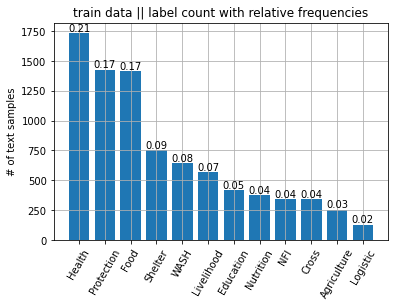

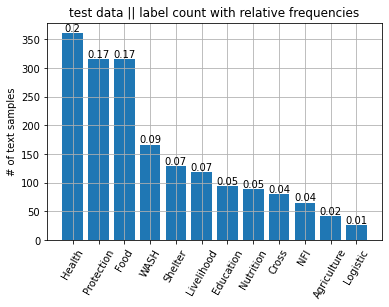

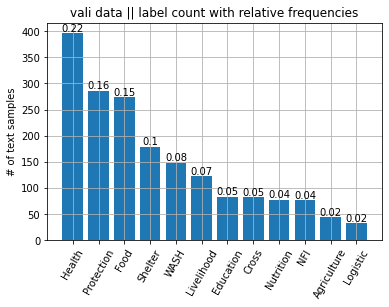

In [10]:
def plot_distri(df, titlle):
    plt.bar(np.arange(12), df.label.value_counts())
    x1 = np.arange(12)
    plt.xticks( x1, np.array(labels)[df.label.value_counts().index.tolist()], rotation=60)
    plt.ylabel('# of text samples')
    plt.grid()
    plt.title(titlle + " || label count with relative frequencies")

    counts = df.label.value_counts()
    rf =[round(x/len(df), 2) for x in counts.tolist()]

    for i in range(len(x1)):
        plt.annotate(str(rf[i]), xy=(x1[i],df.label.value_counts().to_list()[i]), ha='center', va='bottom')
    plt.show();


plot_distri(pd_train, "train data")
plot_distri(pd_test, "test data")
plot_distri(pd_vali, "vali data")

We see that the distribution of labels is not very well e.g. the label Health is very frequent & Logistic very rare. Therfore ouer future models will probably have a hard time predicting for the underrepresented labels & vica verca

But at least the distributions for train, test & validation sets are very similiar. Further more the 3 plots for the small datsets are almost identicly to the 3 from the big datasets.

now I did random vizualizing of the data to get some feeling for it

In [11]:
def show_random_samples(df, how_many = 3):
    for _ in range(how_many):
        x = np.random.choice(len(df))
        l = pd_train.iloc[x].label
        idd = pd_train.iloc[x].id
        print(f"label: {l} = {labels[l]}\t\t id = {idd}", )    
        print(pd_train.iloc[x].text)
        print("\n")

In [12]:
show_random_samples(pd_train, 3)

label: 11 = WASH		 id = 7375
Damage to major community water systems has been reported in Garissa, Makueni and Isiolo counties, while shallow wells have been contaminated in Tana River, Kilifi, and Garissa, as latrines have collapsed or flooded. 


label: 3 = Food		 id = 1311
With forecast of below-normal Gu rainfall, the area planted for Gu crops is likely to be below average. Given likely belowaverage river water levels, irrigated crop cultivation will also be below average. Consequently, agricultural labor demand for land preparation, planting, and weeding are likely to be below normal.


label: 10 = Shelter		 id = 6472
The city of Kouango, located 415 km from Bangui (the capital of the CAR), has been flooded since the 23rd of August1 . These floods caused significant material and human damages. The provisional record shows 350 households, or 1,750 people affected by this tragedy. At least 276 houses are completely destroyed and 74 houses partially destroyed. Some people found shelt

### preprocessing, tokenization & weighting

choosing tensorflow for this project was not an ideal decision but I invested a lot of time already so I kept using it

In [13]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [14]:
X_train, X_test, X_vali = [x.text.to_numpy() for x in [pd_train, pd_test, pd_vali]]
y_train, y_test, y_vali = [y.label.to_numpy() for y in [pd_train, pd_test, pd_vali]]

For preprocessing I decided to use lowercasing + punctuation stripping because this is very common for NLP tasks & the very convinient method TextVectorization from tensorflow has this built in.

- the strategy for  Out-Of-Vocabulary tokens will be turn them into: '[UNK]'

In [15]:
def creat_dict(data, tc_or_tf_idf, cut_off=None):
    '''
    input: 
    1: numpy arrary; 2:"count" for tc OR "tf-idf"; #max number of tokens
    output:
    the text_vectorizer instance
    
    '''
    text_vectorizer = TextVectorization(max_tokens=cut_off, 
                                    standardize="lower_and_strip_punctuation", # how to process text
                                    split="whitespace", # how to split tokens
                                    output_mode=tc_or_tf_idf)#, # how to map tokens to numbers
    text_vectorizer.adapt(data)
    return text_vectorizer

Now we aplly the tokenizer without a treshold for max number of tokens & afterwards we define a treshold

In [16]:
text_v = creat_dict(X_train, "count")

words_in_vocab = text_v.get_vocabulary() # Get the unique words in the vocabulary
top_10_words = words_in_vocab[:10] # most common tokens 
bottom_10_words = words_in_vocab[-10:] # least common tokens

print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_10_words}") 
print(f"Bottom 5 least common words: {bottom_10_words}")

Number of words in vocab: 28314
Top 5 most common words: ['[UNK]', 'the', 'of', 'and', 'in', 'to', 'a', 'are', 'is', 'for']
Bottom 5 least common words: ['003', '002', '00018', '00', '\x1fve', '\x1frst', '\x1fnd', '\x1fltered', '\x1erst', '\x1drewood']


In [17]:
for i, w in enumerate(words_in_vocab):
    print(i, w)

0 [UNK]
1 the
2 of
3 and
4 in
5 to
6 a
7 are
8 is
9 for
10 have
11 as
12 on
13 food
14 from
15 by
16 with
17 that
18 people
19 were
20 has
21 been
22 at
23 water
24 cases
25 reported
26 children
27 their
28 health
29 areas
30 2017
31 an
32 be
33 was
34 affected
35 or
36 this
37 more
38 access
39 than
40 they
41 due
42 also
43 not
44 which
45 some
46 including
47 most
48 said
49 humanitarian
50 per
51 who
52 since
53 displaced
54 there
55 will
56 it
57 over
58 security
59 million
60 assistance
61 need
62 households
63 number
64 during
65 these
66 refugees
67 percent
68 cent
69 needs
70 all
71 country
72 services
73 two
74 many
75 other
76 2016
77 out
78 families
79 while
80 between
81 lack
82 had
83 one
84 population
85 women
86 total
87 high
88 according
89 government
90 region
91 no
92 new
93 situation
94 deaths
95 may
96 area
97 but
98 emergency
99 acute
100 city
101 state
102 insecurity
103 idps
104 malnutrition
105 prices
106 schools
107 year
108 risk
109 cholera
110 phase
111 ipc


1687 deficit
1688 collected
1689 begin
1690 appropriate
1691 anbar
1692 76
1693 74
1694 200000
1695 whole
1696 vaccines
1697 usually
1698 upon
1699 troops
1700 transit
1701 tons
1702 term
1703 separate
1704 requested
1705 representative
1706 reception
1707 range
1708 press
1709 party
1710 pa
1711 northwestern
1712 news
1713 mothers
1714 met
1715 melkadida
1716 mayendit
1717 malawi
1718 lra
1719 index
1720 forest
1721 fell
1722 extensive
1723 exposure
1724 events
1725 effect
1726 cox’s
1727 countryside
1728 conflictaffected
1729 claimed
1730 challenging
1731 casepatients
1732 business
1733 bodies
1734 blankets
1735 asked
1736 afghan
1737 abu
1738 yei
1739 wild
1740 weekend
1741 vehicles
1742 unsafe
1743 treat
1744 traders
1745 struck
1746 stations
1747 stands
1748 shan
1749 seriously
1750 route
1751 refuge
1752 raising
1753 raised
1754 pest
1755 opened
1756 member
1757 leer
1758 lebanon
1759 instead
1760 here
1761 growth
1762 greatest
1763 extent
1764 eritrea
1765 diesel
1766 comprehens

2944 settled
2945 sd
2946 rubella
2947 revised
2948 respective
2949 ready
2950 quake
2951 pushed
2952 priorities
2953 pockets
2954 plantations
2955 piped
2956 petrol
2957 pcr
2958 payments
2959 panyijiar
2960 pahang
2961 owners
2962 nearest
2963 named
2964 militant
2965 miles
2966 meteorological
2967 mauritania
2968 maputo
2969 manage
2970 maintained
2971 lighting
2972 lesotho
2973 kassala
2974 kajiado
2975 johor
2976 jere
2977 intimidation
2978 inkind
2979 initially
2980 infested
2981 infants
2982 identity
2983 hold
2984 highway
2985 hardship
2986 goat
2987 focused
2988 fight
2989 exposing
2990 explosion
2991 exercise
2992 exceeded
2993 estimations
2994 establishment
2995 escalating
2996 escalated
2997 engaging
2998 ends
2999 ended
3000 elements
3001 effectively
3002 duk
3003 dref
3004 downward
3005 doctor
3006 directorate
3007 develop
3008 devastated
3009 depending
3010 defecation
3011 debt
3012 dar’a
3013 constrained
3014 consequence
3015 conflictrelated
3016 collaboration
3017 clea

4936 diyala
4937 distribute
4938 disorders
4939 dirty
4940 dinar
4941 diminishing
4942 didn’t
4943 detentions
4944 depressed
4945 deplorable
4946 depends
4947 dependence
4948 delgado
4949 defined
4950 deficiencies
4951 deadliest
4952 daesh
4953 d
4954 custody
4955 crippling
4956 counted
4957 cough
4958 corps
4959 coordinate
4960 controls
4961 contrast
4962 contrary
4963 contagious
4964 constitutional
4965 congested
4966 confl
4967 compare
4968 comparable
4969 cocoa
4970 clearing
4971 cite
4972 ciego
4973 cholerae
4974 chance
4975 chairman
4976 ceased
4977 cdr
4978 caves
4979 bus
4980 burtinle
4981 branch
4982 block
4983 bimodal
4984 bauchi
4985 barrel
4986 banki
4987 bang
4988 banditry
4989 banana
4990 bama
4991 badakhshan
4992 awerial
4993 avert
4994 assistanceas
4995 ask
4996 asia
4997 apply
4998 apparent
4999 anxiety
5000 antonio
5001 announcement
5002 analyzed
5003 ana
5004 american
5005 alshabab
5006 allied
5007 alive
5008 algeria
5009 albania
5010 alarm
5011 agent
5012 advocate
5

6847 powder
6848 postpone
6849 postgu
6850 possibilities
6851 politically
6852 pochalla
6853 plunged
6854 plumpy
6855 plummeting
6856 plays
6857 plantains
6858 pieces
6859 philip
6860 phccs
6861 peuhl
6862 petroleum
6863 peshawar
6864 pervasive
6865 persistently
6866 perpetrator
6867 perilous
6868 performed
6869 peninsular
6870 peaks
6871 payroll
6872 pave
6873 pauktaw
6874 patients’
6875 pathways
6876 pathway
6877 passes
6878 participating
6879 park
6880 parasite
6881 paramilitary
6882 papers
6883 panyikang
6884 panel
6885 pains
6886 packed
6887 owning
6888 overseas
6889 overly
6890 overlooking
6891 outposts
6892 outlying
6893 outlets
6894 ouham
6895 otps
6896 ordinary
6897 orchards
6898 opponents
6899 operators
6900 operates
6901 onethird
6902 omar
6903 ogun
6904 offset
6905 offensives
6906 obock
6907 nugal
6908 novemberdecember
6909 notifications
6910 notification
6911 noor
6912 nomads
6913 niña
6914 nigeria’s
6915 nierteti
6916 nevis
6917 neighbors
6918 neglected
6919 nearaverage
6

8685 zeid
8686 zeayan
8687 zanzibar
8688 zanjan
8689 zambezia
8690 zamalka
8691 zaire
8692 zahraa
8693 yumbe
8694 yousif
8695 younis
8696 yearsold
8697 yaoundé
8698 wvi
8699 wr
8700 wound
8701 wounaan
8702 world”
8703 workplaces
8704 workers’
8705 wore
8706 woodland
8707 woes
8708 wishes
8709 wine
8710 widowed
8711 whos
8712 whereby
8713 wellbelow
8714 welcomes
8715 weigh
8716 wed
8717 web
8718 wear
8719 weaponry
8720 wealth
8721 weaker
8722 weakens
8723 wbeg
8724 waterrelated
8725 waterpoints
8726 watchdog
8727 washington
8728 war”
8729 wardhiigleey
8730 wardak
8731 wants
8732 wad
8733 vuli
8734 vs
8735 voted
8736 voices
8737 voice
8738 vodocanal
8739 voa
8740 visibility
8741 virgin
8742 violencethe
8743 violencerelated
8744 violated
8745 videos
8746 victoria
8747 vice
8748 veterinary
8749 venture
8750 vascular
8751 varieties
8752 variability
8753 van
8754 valued
8755 vacate
8756 uzbekistan
8757 utterly
8758 utmost
8759 utilize
8760 usaidofda
8761 usaidffp
8762 usaid
8763 uruzgan
8764

10935 underscored
10936 underneath
10937 underfi
10938 undecided
10939 undamaged
10940 undac
10941 uncontrollable
10942 unchr
10943 unchiprang
10944 unchecked
10945 unchartered
10946 unaware
10947 unaffected
10948 unaddressed
10949 unactable
10950 unacceptably
10951 unacceptable”
10952 umma
10953 umerkot
10954 ukraines
10955 ukbased
10956 ujung
10957 uige
10958 ugxkg
10959 ugandas
10960 ugandans
10961 ubonrat
10962 uascthe
10963 uae
10964 uacs
10965 u5
10966 u2
10967 u
10968 ténéré
10969 técnico
10970 twoweeks
10971 twoway
10972 twofold
10973 twoday
10974 twitter
10975 twentyseven
10976 tuyen
10977 tuy
10978 turnout
10979 turkishbacked
10980 turkeys
10981 turbulent
10982 tuong
10983 tunisian
10984 tun
10985 tumbe
10986 tuesdaysevere
10987 tuberculosis”
10988 tubas
10989 tubage
10990 tu
10991 truth
10992 trust
10993 truce
10994 trolleys
10995 tripura
10996 tripped
10997 trinidad
10998 triggers
10999 tries
11000 trickling
11001 trickle
11002 tribune
11003 triangle
11004 triage
11005 tren

12926 ild
12927 ikom
12928 iishanas
12929 igbo
12930 iftar
12931 iec
12932 idris
12933 idps—children
12934 idlib’s
12935 idleness
12936 idf
12937 identities
12938 identical
12939 ideam
12940 ideal
12941 idea
12942 iceberg
12943 icane
12944 ibuted
12945 ibadan
12946 iasn
12947 ial
12948 ia
12949 hz
12950 hypermarkets
12951 hyperinflation
12952 hydrometeorological
12953 hydrological
12954 huya
12955 hurriyet
12956 hurricanestrength
12957 hurricaneaffected
12958 hurricane14
12959 hurricane12
12960 hurl
12961 hunter
12962 hunt
12963 hunger”
12964 hunger“yes
12965 hungary
12966 hundredsofthousands
12967 hunan
12968 humiliation
12969 humidityrelated
12970 humedica
12971 humantohuman
12972 humanitari
12973 humaitrain
12974 hulu
12975 huila
12976 hugely
12977 huesing
12978 hubei
12979 hualien
12980 hu
12981 htun
12982 hpakant
12983 housetohouse
12984 household’s
12985 households—are
12986 houn
12987 hostile
12988 hostel
12989 horrible
12990 hopper
12991 hopeful
12992 hoped
12993 hop
12994 hons

14769 289
14770 287964
14771 286000
14772 281000
14773 2809
14774 2800
14775 2768
14776 27500
14777 2731
14778 2705
14779 268549
14780 2665
14781 266
14782 265
14783 263
14784 2628
14785 262
14786 2617
14787 2587
14788 257girls
14789 257100000
14790 257
14791 256000
14792 254379
14793 2540
14794 251
14795 24930
14796 249
14797 248054
14798 248000
14799 24755
14800 2444000
14801 2430
14802 23–29
14803 23yearold
14804 2391
14805 23506
14806 2340
14807 23350
14808 2324
14809 230pm
14810 230300
14811 230000
14812 22m
14813 224664
14814 22464
14815 2232
14816 2228
14817 21yearold
14818 21750
14819 21500
14820 2146
14821 2140
14822 2133
14823 21300
14824 2114
14825 2102
14826 210000
14827 20oc
14828 20km
14829 2069
14830 2056
14831 204000
14832 203374
14833 2029
14834 2025
14835 202282
14836 2020“
14837 2018mauritania
14838 2017bthere
14839 2017b
14840 20172
14841 2016the
14842 2016b
14843 20102016
14844 201011
14845 20092010
14846 200900
14847 2003
14848 2000s
14849 2000hectares
14850 1”
14

17183 slightlyimproved
17184 slide
17185 sleeves
17186 sleet
17187 sleeps
17188 sleeplessness
17189 sleem
17190 slavery—wherein
17191 slaveholding
17192 slashed
17193 slapped
17194 slander
17195 slammed
17196 slain
17197 skool
17198 skinny
17199 skinned
17200 skill
17201 skeptical
17202 skeletons
17203 skardu
17204 sizeable
17205 siyo
17206 sixyearold
17207 sixtytwo
17208 sixtyfour
17209 sixtyeight
17210 siverskyi
17211 sivas
17212 situation369
17213 situaon
17214 sitrep
17215 sitin
17216 sitiaccording
17217 site’s
17218 sitesin
17219 sited
17220 sisi
17221 sisacam
17222 sirwah
17223 sirte’s
17224 sirnak
17225 sirisena
17226 sirens
17227 sirba
17228 sirao
17229 sirajiya
17230 sioner
17231 sinuni
17232 sint
17233 sinsin
17234 sinkhole
17235 sinistrés
17236 sinhala
17237 singlewave
17238 singleparent
17239 singlehead
17240 singa
17241 sing
17242 sindhsindh
17243 sindhs
17244 sincesome
17245 sincerely
17246 sincedestroyed
17247 sinaproc
17248 sinaloa
17249 sinai’s
17250 sina
17251 simwaka

18933 partaking
18934 parrita
18935 parliamentarians
18936 paris
18937 pariang
18938 pariakspeaking
18939 parenting
18940 pardon
18941 parcular
18942 parcipaon
18943 paraíso
18944 paras
18945 paranggupito
18946 parameters
18947 paramedic
18948 paralyzing
18949 paralysing
18950 paral
18951 parajallah
18952 paraguay
18953 parade
18954 paracetamol
18955 paperwork
18956 papersyoung
18957 paolo
18958 panyinjar
18959 panyijiarafter
18960 panyang
18961 pants
18962 panthyal
18963 pantar
18964 panjsher
18965 panjgur
18966 panjgoor
18967 panicked
18968 pangak
18969 pandemic
18970 pandai
18971 pancare—began
18972 panariti
18973 pamach
18974 palpable
18975 palpa
18976 palmyra
18977 palliative
18978 palletized
18979 palatability
18980 palakkad
18981 paktitka
18982 pakistan”
18983 pakistanishuman
18984 pakistaniran
18985 pakiran
18986 paint
18987 painstaking
18988 painful
18989 paila
18990 pahowho
18991 pagil
18992 pagiel
18993 pager
18994 pagawayan
18995 pafuri
18996 paediatrics
18997 pads
18998 pa

20540 lknur
20541 lk
20542 liwolo
20543 livingstone
20544 livingsome
20545 livingfarah
20546 livingcosts
20547 live”
20548 livestock”
20549 livestock“the
20550 livestock—among
20551 livestocktocereal
20552 livestockthe
20553 livestocksupport
20554 livestockproduction
20555 livestockbased
20556 livestockalthough
20557 livest
20558 liveson
20559 livesaving
20560 livelihoodzone
20561 livelihoods”
20562 livelihoodsvery
20563 livelihoodrelief
20564 livel
20565 livefire
20566 livebelow
20567 litter
20568 litany
20569 listeners
20570 listen
20571 lished
20572 liqya
20573 liquefied
20574 linguisc
20575 line”
20576 linelistthis
20577 linelist
20578 lined
20579 linear
20580 lindi
20581 limuro
20582 limted
20583 limited195
20584 limete
20585 lim
20586 lilian
20587 likoni
20588 likelihoodrisk
20589 likando
20590 ligthia
20591 lights
20592 lighterskinned
20593 lifewithout
20594 lifesustaining
20595 lifespan
20596 lifeskillshygiene
20597 lifelong
20598 lieutenantgeneral
20599 lidasan
20600 lid
20601

22268 graveyards
22269 gravel
22270 gratitude
22271 grassroots
22272 grassland
22273 grappling
22274 grapples
22275 grappled
22276 graph1
22277 grape
22278 granma
22279 grandi
22280 grandeanse
22281 granaries
22282 gran
22283 grams”
22284 grams
22285 graines
22286 graindeficit
22287 graffiti
22288 graduates
22289 grading
22290 grade”
22291 gradethe
22292 grabbingoccupation
22293 grabbing11
22294 grabbed
22295 grab
22296 govinda
22297 governors
22298 governorate’s
22299 governorate are
22300 governorates2
22301 government”those
22302 government”allah
22303 government“we
22304 government–implemented
22305 governmentsubsidized
22306 governmentgovernment
22307 governmentfunded
22308 governmentemployees
22309 governmentayuel
22310 governmentallied
22311 governmentaffiliated
22312 governing
22313 gove
22314 gourounguel
22315 gourde
22316 goscontrolled
22317 gorwai
22318 goromgorom
22319 gorom
22320 gorodok
22321 gore
22322 gordon
22323 gordhan
22324 gop
22325 good’
22326 goods”
22327 goodbye

23932 dawanu
23933 daunting
23934 daughter’s
23935 dating
23936 date61
23937 datapoint
23938 dashtiabdan
23939 das
23940 darzab
23941 darwins
23942 darpakhel
23943 darkerskinned
23944 darkened
23945 darjeeling
23946 dargu
23947 darfurwater
23948 darfurn
23949 darfurit
23950 darfurin
23951 darfuri
23952 darfurdarfur
23953 darfuralthough
23954 darfour
23955 dare
23956 darashakran
23957 dara
23958 dapeng
23959 dapchi
23960 dapard
23961 daoud
23962 danubyu
23963 danot
23964 danny
23965 danno
23966 danger”
23967 dangerous”
23968 dangam
23969 dang
23970 dandume
23971 dande
23972 danchurchaid
23973 dance
23974 damrey
23975 dampness
23976 dampened
23977 damning
23978 damnificados
23979 damn
23980 dammr
23981 dambala
23982 damask
23983 damarjog
23984 damage”
23985 damage’
23986 damaged”
23987 damagedthe
23988 damaged6494
23989 damaged1
23990 damagecontinued
23991 daloa
23992 daleh
23993 daktek
23994 dakouo
23995 dajan
23996 dain
23997 daikonda
23998 dahn
23999 dahman
24000 dahi
24001 daher
2400

26043 alhoot
26044 alhoceima
26045 alhisha
26046 alhayah
26047 alhawayes
26048 alhashd
26049 alhasaka
26050 alhanuteh
26051 alhamra
26052 alhamidiyah
26053 alhamar
26054 alhalis
26055 alhalio
26056 alhalawah
26057 alhaji
26058 alghab
26059 alger
26060 alfuaa
26061 alfotouh
26062 alfijah
26063 alfeel
26064 alfawqa
26065 alfalouji
26066 alfalah
26067 alfakhit
26068 alfakhari
26069 alexis
26070 alexander
26071 alex
26072 alerttotal
26073 alertserious
26074 alertoutbreak
26075 alerting
26076 alertepidemic
26077 alertand
26078 alejandro
26079 alebri
26080 aldora
26081 aldhiban
26082 aldeek
26083 aldeeb
26084 aldahla
26085 albu
26086 albrayga
26087 alboyoud
26088 albolail
26089 albokamal
26090 albino
26091 alberto
26092 alba’aj
26093 albashir
26094 albarada
26095 albakush
26096 alayasir
26097 alawwad
26098 alawsat
26099 alawaj
26100 alaual
26101 alarifi
26102 alarab
26103 alaqwas
26104 alamyar
26105 alamu
26106 alamar
26107 alamal
26108 alamach
26109 alam
26110 alajuela
26111 alajinapeulh
26

28283 035kg
28284 03012017
28285 029
28286 028
28287 027
28288 026
28289 025
28290 020
28291 01m
28292 019
28293 0175
28294 015
28295 013
28296 012
28297 011
28298 01062018
28299 0103
28300 010
28301 008
28302 0047
28303 0040
28304 003
28305 002
28306 00018
28307 00
28308 ve
28309 rst
28310 nd
28311 ltered
28312 rst
28313 rewood


we looked manualy for a good treshold i.e. the i-th word in the vocabulary were afterwards the words got strange, maybe we will decrease this treshold later to see whether it increases performance or not: 14200

In [18]:
cut_off = 14200
text_v = creat_dict(X_train, "tf-idf", cut_off)

words_in_vocab = text_v.get_vocabulary() # Get the unique words in the vocabulary
top_10_words = words_in_vocab[:10] # most common tokens 
bottom_10_words = words_in_vocab[-10:] # least common tokens

print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_10_words}") 
print(f"Bottom 5 least common words: {bottom_10_words}")

Number of words in vocab: 14200
Top 5 most common words: ['[UNK]', 'the', 'of', 'and', 'in', 'to', 'a', 'are', 'is', 'for']
Bottom 5 least common words: ['attitudes', 'attention”', 'attendants', 'attan', 'attaining', 'atlantic', 'athens', 'athba', 'ate', 'ast']


In [19]:
# let´s show the mapping of the 5th X_train sentence for tf-idf

for pair in zip(X_train[4].split(), text_v([X_train[4]]).numpy()[0]):
    print(f"{pair[0]}   ->  {pair[1]}")

Unidentified   ->  0.0
gunmen   ->  0.7634485363960266
attacked   ->  0.781738817691803
a   ->  0.7939518690109253
civilian   ->  1.5836460590362549
home,   ->  0.0
killing   ->  2.276442766189575
10   ->  0.0
members   ->  0.0
of   ->  0.0
a   ->  0.0
single   ->  0.0
family,   ->  1.4438540935516357
including   ->  0.0
women   ->  0.0
and   ->  0.0
children,   ->  0.0
in   ->  0.0
eastern   ->  1.5760085582733154
Laghman   ->  1.6354613304138184
province,   ->  0.0
an   ->  0.0
official   ->  1.6915788650512695
said   ->  0.0
on   ->  0.0
Monday.   ->  0.0
At   ->  1.9816431999206543
least   ->  0.0
four   ->  0.0
people   ->  0.0
were   ->  0.0
wounded   ->  1.9398125410079956
in   ->  0.0
the   ->  0.0
bomb   ->  0.0
attack   ->  0.0


### Creating sentence vectors 

- tc: Term count // tf: Term Frequency
- tf-idf: Term frequency-Inverse document frequency

We later decided to use "tf" instead of "tc", so everytime we wrote "tc" we now mean "tf", I hope this is okay.

In [20]:
def tff(my_array): # list of arrays
    #my_array = np.array(my_list)
    my_array = my_array.numpy()
    my_array = np.log(my_array + 1)    
    return tf.convert_to_tensor(my_array, np.float32) # get for all sentences/ENTRIES the tf

In [21]:
vector_tc = creat_dict(X_train, "count", cut_off)
vector_tfidf = creat_dict(X_train, "tf-idf", cut_off)

In [22]:
tc_vec_train = tff(vector_tc(X_train))
tc_vec_test = tff(vector_tc(X_test))
tc_vec_vali = tff(vector_tc(X_vali))

In [1]:
#tfi_vec_train = vector_tfidf(X_train) # results in: ResourceExhaustedError 
tfi_vec_test = vector_tfidf(X_test)
tfi_vec_vali = vector_tfidf(X_vali)

NameError: name 'vector_tfidf' is not defined

In [24]:
# because of the ResourceExhaustedError I just split X_train in two halves, then do tf-idf & put it back together
#tfi_vec_train_1 = vector_tfidf(X_train[ : int(len(X_train)/2)])
#tfi_vec_train_2 = vector_tfidf(X_train[int(len(X_train)/2) : ])
#tfi_vec_train = tf.concat([tfi_vec_train_1, tfi_vec_train_2], axis=0)
#tfi_vec_train

In [ ]:
# because of the ResourceExhaustedError I just split X_train in two halves, then do tf-idf & put it back together
tfi_vec_train_1 = vector_tfidf(X_train[ : int(len(X_train)/2)])


In [ ]:
tfi_vec_train_2 = vector_tfidf(X_train[int(len(X_train)/2) : ])

In [ ]:
tfi_vec_train = tf.concat([tfi_vec_train_1, tfi_vec_train_2], axis=0)
tfi_vec_train

In [ ]:
def sparsity(vector):
    '''
    It´s not clear to me how to excactly interpret the sparsity rate from the assigenment sheet, so I tried two interpretations:
    1: n = Number of vectors where all entries are 0. Then calculate n / #_of_vectors
    The result of this approach was always 0 for me for train/test/vali- tc & tf-idf. Therfor I choose the following formula
    
    2: n = Number of all 0 entries in the matrix
    return n / total_#_of_entries
    '''
    vector = vector.numpy()
    
    non_zero = np.count_nonzero(vector)
    sparsity = (np.product(vector.shape) - non_zero) / np.product(vector.shape)
    return sparsity
    

In [ ]:
# the list of numbers below corresponds to the sparsity rates in the lest of vectors below. (tfi = tf-idf)

for vec in [tc_vec_train, tc_vec_test, tc_vec_vali, tfi_vec_train, tfi_vec_test, tfi_vec_vali]:
    print(sparsity(vec))

As we can see the sparsity rates are very high & as expected: the sparsity rate of both training data´s is a bit lower i.e. there are less "0" entries than for test & vali.

### Dimensionality reduction SVD

In [ ]:
def save_time(train_matrix):
    '''
    since this  part of SVD is independent from k but takes ages to compute, we only do it once for tc & tf-idf to save time
    '''
    u, s, vT = np.linalg.svd(train_matrix.T, full_matrices=False)
    return [u, s, vT]

def svd_train(train, k, u_s_vT):
    # train:
    #u, s, vT = np.linalg.svd(train.T, full_matrices=False)
    u, s, vT = u_s_vT
    uk_T = np.transpose( u[:,:k] )
    sk_inv = np.linalg.inv( np.diag(s[:k]) )
    train_low_dim_doc = vT[:k, :]
    
    return train_low_dim_doc.T, uk_T, sk_inv
    
def svd_inference(v_input, uk_T, sk_inv):
    # inference:
    v_out_low_dim_doc = sk_inv @ uk_T @ np.transpose(v_input) 
    return v_out_low_dim_doc.T

# This, as well as many other unnecessary things, is here due to ouer notebook merge - because of ouer troubles with the groups.
def truncated_inference(v_input, u,s,vT,k):
    # inference:
    uk_T = np.transpose( u[:,:k] )
    sk_inv = np.linalg.inv( np.diag(s[:k]) )
    train_low_dim_doc = np.transpose(vT[:k, :])
    v_out_low_dim_doc = sk_inv @ uk_T @ np.transpose(v_input) 
    
    return train_low_dim_doc, np.transpose(v_out_low_dim_doc)

the h.d. matrices are already produced above 
- Token Weighting I - High Dimensional
- Token Weighting II - High Dimensional

Now I will set k = 2 & plot the training vectors for the following:
- Token Weighting I - Low Dimensional
- Token Weighting II - Low Dimensional

In Task b I will use k as a hyperparameter for training in the range of 10 < k < 1000

In [ ]:
u_s_vT_tc = save_time(tc_vec_train.numpy())
u_s_vT_tfidf = save_time(tfi_vec_train.numpy())

In [ ]:
tokwei_1 = svd_train(tc_vec_train.numpy(), 2, u_s_vT_tc)[0]
tokwei_2 = svd_train(tfi_vec_train.numpy(), 2, u_s_vT_tfidf)[0]

In [ ]:
def plot_dimreduced(data, y):
    for i in range(12):
        plt.scatter(data[:,0][y == i], data[:,1][y == i], label=f"{str(i)}")
    plt.rcParams["figure.figsize"] = (12,6)
    plt.xlabel("dimension 0")
    plt.ylabel("dimension 1")
    plt.legend()
    plt.xlim(-0.10, 0) # this "removes" just 2 (extreme) outliers from the plots, making them prettier
    plt.ylim(-0.08, 0.1)
    plt.show();

In [ ]:
print("Token Weighting I - Low Dimensional || tc")
plot_dimreduced(tokwei_1, y_train)

print("Token Weighting II - Low Dimensional || tf-idf")
plot_dimreduced(tokwei_2, y_train)

It seems like for k=2 the reduction doesnt yield any good clusters - I hope I did nothing wrong

<a name="section-training"></a><h2 style="color:rgb(0,120,170)">Task B: Training and Results Analysis (15 points)</h2>

<div style="background-color:rgb(224, 243, 255)">

To evaluate the models, use <ins>accuracy</ins> as the metric throughout the task. 

**Dummy baseline (2 points).** Create one dummy baseline classifier that predicts the validation/test labels only based on the distribution of the labels in the training set (without any use of the feature vectors). This is a weak baseline and acts as a sanity check for the actual classifiers.

**Training and tuning classifiers (5 points).** Select at least <ins>two classification algorithms</ins> from standard machine learning classifiers. Using each classification algorithm, train a machine learning model on each of the variations of feature vectors. This should result in <ins>eight experiment sets</ins> (4 variations of feature vectors × 2 classification algorithms). The ML model in each of the experiments possibly have several involving hyper-parameters (also keep in mind the dimensionality size $k$ in the low-dimensional vectors as yet another hyper-parameter). For each experiment, select <ins>one of the hyper-parameters and tune its value</ins>. The tuning process is done by first assigning at least <ins>five different values</ins> to the hyper-parameter, then training separate models based on each value, and finally using the evaluation results on the validation set to select the best-performing model. Report the studied hyper-parameters, the evaluation results of each on validation set, and finally the selected value of the hyper-parameter. 

**Evaluation and plots (3 point).** Evaluate the selected model of the eight experiment on the test set and report the results of the experiments on <ins>both validation and test sets (side by side) in one table as well as in one plot</ins>. Compare different models. Are the test results lower(/higher) than the validation results? If it is the case, where can it be rooted from? Among all these models and variations, what are the most important factors improving the classification results?

**Confusion matrix (2 point).** Select the best performing model among the experiments and use it to create a confusion matrix. The matrix shows the predicted versus true results per each label. Explain your observations on the matrix. Across which classes do you observe significant confusions?

**Features visualization (3 point).** Continue with the best performing model and now take its feature vectors for the *dataitems in the test set*. Project these feature vectors to a 2-dimensional space using the TSNE method.  Using these 2-dimensional vectors, create two plots where the dataitems are shown as points (small circles) on the plots. The plots look exactly the same but only differ in the coloring of the data points. The first plot colors every dataitem with its *true label*, while the second one colors each according to its *predicted label by the model*. Keep in mind to assign the same colors to the classes of the plots, so that the plots are visually comparable. Put these two plots side by side, observe the differences, and compare the results. Report your observations.

</div>

### dummy baseline

In [ ]:
pd_train.label.value_counts()#.max()

Since label = 4 has the most occurences we choose this one. This is true for size small & medium.

Note: because the labels are not equaly distributed ouer Baseline is better than just random prediction.

In [ ]:
def dummy_base(Input):
    return np.array([4] * Input.shape[0])

n_true = (dummy_base(X_vali) == y_vali).sum()
print(f"For the validation set the accuracy of the dummy baseline = {round(n_true / len(y_vali), 2)}")

### Training and tuning classifiers
## K nearest neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
def knn_train(X, y, n_neighbors, k=None, u_s_vT=None):
    '''
    Input: X = tc or tf-idf dict
    '''
    if not isinstance(X, np.ndarray):
        X = X.numpy()
    
    uk_T, sk_inv = None, None
    if k:
        print("do the k")
        X, uk_T, sk_inv = svd_train(X, k, u_s_vT)
    
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X, y)
    
    return knn, uk_T, sk_inv

In [ ]:
def knn_infer(knn, V_input, y, uk_T=None, sk_inv=None):
    '''
    Input: V_input = tc or tf-idf dict
    '''
    
    if not isinstance(V_input, np.ndarray):
        V_input = V_input.numpy()

    if type(None) != type(uk_T):
        V_input = svd_inference(V_input, uk_T, sk_inv)
    
    y_pred = knn.predict(V_input)
    correct_preds = (y == y_pred).sum()
    accuracy = correct_preds / len(y)
    
    return y_pred,  accuracy

#### tc dataset names from above

For those the hyperparamter seach just involved the k_neighbors list

- tc_vec_train
- tc_vec_test
- tc_vec_vali

#### tf-idf dataset names from above

For those we did a grid search, with the following procedure: take the first k_neighbor value, fix it & then try every value from the k_svd_list. Then repeat this with the second k_neigbhor value.

- tfi_vec_train
- tfi_vec_test
- tfi_vec_vali

In [ ]:
k_neighbors = [1, 2, 4, 8, 16, 32, 100]
k_svd_list = [15,50,100,500,900]

In [ ]:
def hyperpsearch(train_vec, test_vec, k_neighbors=k_neighbors, k_svd_list=[None], u_s_vT=None):
    knn_models_dict = {}
    accuracy_list = []  

    for k_nei in k_neighbors:
        for k_svd in k_svd_list:
            print(f"Experiment with k_nei = {str(k_nei)} & k_svd = {str(k_svd)} started")
            knn, uk_T, sk_inv= knn_train(train_vec, y_train, k_nei, k=k_svd, u_s_vT=u_s_vT)
            y_pred_test,  accuracy_test = knn_infer(knn, test_vec, y_vali, uk_T, sk_inv)
            print(f"accuracy = {accuracy_test} \n")

            knn_models_dict[(k_nei, k_svd)] = knn
            accuracy_list.append(accuracy_test)

    accuracy_list = np.array(accuracy_list)
    
    x_max = 35 if type(None) != type(u_s_vT) else 6
    plt.plot(accuracy_list)
    plt.axline((0, 0.2), (x_max, 0.2), c="red", label="baseline")
    plt.legend();
    return knn_models_dict, accuracy_list

### tc high dimensional
accuracy on the test set

In [ ]:
knn_models_dict_TChigh, accuracy_list_TChigh = hyperpsearch(tc_vec_train, tc_vec_vali)

### tf-idf high dimensional
accuracy on the test set

In [ ]:
knn_models_dict_TFIDFhigh, accuracy_list_TFIDFhigh = hyperpsearch(tfi_vec_train, tfi_vec_vali)

### tc low dimensional
accuracy on the test set

In [ ]:
knn_models_dict_TChlow, accuracy_list_TClow = hyperpsearch(tc_vec_train, tc_vec_vali, k_svd_list= k_svd_list, u_s_vT= u_s_vT_tc)

### tf-idf low dimensional
accuracy on the test set

In [ ]:
knn_models_dict_TFIDFlow, accuracy_list_TFIDFlow = hyperpsearch(tfi_vec_train, tfi_vec_vali, k_svd_list=k_svd_list, u_s_vT=u_s_vT_tfidf)

From the 4 validation procedures above we take the 4 best models & evaluate them on the test sets

In [ ]:
knn_vali_accu_list = [0.4527777777777778, 0.39444444444444443, 0.4816666666666667, 0.5566666666666666]

In [ ]:
knn_test_accu_list = []


knn_1 = knn_models_dict_TChigh[(32, None)]
_,  accuracy1 = knn_infer(knn_1, tc_vec_test, y_test, uk_T=None, sk_inv=None)

knn_2 = knn_models_dict_TFIDFhigh[(1, None)]
_,  accuracy2 = knn_infer(knn_2, tfi_vec_test, y_test, uk_T=None, sk_inv=None)

knn_3 = knn_models_dict_TChlow[(32, 50)]
_, uk_T_3, sk_inv_3 = svd_train(tc_vec_train.numpy(), 50, u_s_vT_tc)
_,  accuracy3 = knn_infer(knn_3, tc_vec_test, y_test, uk_T_3, sk_inv_3)

knn_4 = knn_models_dict_TFIDFlow[(32, 50)]
_, uk_T_4, sk_inv_4 = svd_train(tfi_vec_train.numpy(), 50, u_s_vT_tfidf)
_,  accuracy4 = knn_infer(knn_4, tfi_vec_test, y_test, uk_T_4, sk_inv_4)

In [ ]:
knn_test_accu_list = [eval(f"accuracy{i}") for i in range(1, 5)]
knn_test_accu_list

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pickle

In [ ]:
def RF(train_X, train_y, vali_X, depth):
  rf = RandomForestClassifier(max_depth=depth,random_state=21)
  rf.fit(train_X, train_y)
  return rf.predict(vali_X), rf

In [ ]:
def RF_checking(new_train_path, new_validation_path, train_tf, vali_tf, k_list=['no k'], name_file='tf_full'):
  train_df = pd.read_csv(new_train_path, sep=',', names=['sentence_id','sentence_str', 'sentence_class'])
  y_train = list(train_df['sentence_class'])

  vali_df = pd.read_csv(new_validation_path, sep=',', names=['sentence_id','sentence_str', 'sentence_class'])
  y_vali_true = list(vali_df['sentence_class'])

  max_depth_list = [2, 10, 15, 30, 50, None]

  acc_list = []
  Pkl_Filename = name_file + "_RF_model.pkl"  

  if k_list[0]=='no k':
    train_tf2, vali_tf2 = train_tf, vali_tf

  else:
    u, s, vT = np.linalg.svd(train_tf.T, full_matrices=False)
    print('training svd done')

  for k in k_list:
    if k_list[0]!='no k':
      train_tf2, vali_tf2 = truncated_inference(vali_tf, u,s,vT,k)

    for d in max_depth_list:

      pred, mod_rf = RF(train_tf2, y_train, vali_tf2, depth=d)
    
      acc = len(np.where(y_vali_true==pred)[0])/len(pred) 
        
      # always save the model which is currently the best:
      if acc_list==[]:
        with open(Pkl_Filename, 'wb') as file:  
          pickle.dump(mod_rf, file)
          k_best = k
          acc_best = acc
          d_best = d

      elif max(acc_list) < acc:
        with open(Pkl_Filename, 'wb') as file:  
          pickle.dump(mod_rf, file)
        k_best = k
        acc_best = acc
        d_best = d

      acc_list.append(acc)

  return k_best, acc_best, d_best, acc_list

In [ ]:
new_train_path = Z_train_dir
new_test_path = Z_test_dir
new_validation_path = Z_validation_dir

train_tf = tc_vec_train.numpy()
vali_tf =  tc_vec_vali.numpy()
test_tf =  tc_vec_test.numpy()

train_tfidf =  tfi_vec_train.numpy()
vali_tfidf =  tfi_vec_vali.numpy()
test_tfidf =  tfi_vec_test.numpy()

In [ ]:
# RF tf full matrices:
k_best_rf_tf_full, acc_best_rf_tf_full, d_best_rf_tf_full,acc_list_rf_tf_full = RF_checking(new_train_path, new_validation_path, train_tf, vali_tf)

In [ ]:
# RF tf truncated matrices: 
k_list = [15,50,100,500,900]
k_best_rf_tf_trun, acc_best_rf_tf_trun, d_best_rf_tf_trun,acc_list_rf_tf_trun = RF_checking(new_train_path, new_validation_path, train_tf, vali_tf, name_file='tf_trun',k_list=k_list)

In [ ]:
# RF tf-idf full matrices:
k_best_rf_tfidf_full, acc_best_rf_tfidf_full, d_best_rf_tfidf_full,acc_list_rf_tfidf_full = RF_checking(new_train_path, new_validation_path, train_tfidf, vali_tfidf, name_file='tfidf_full')

In [ ]:
# RF tf-idf truncated matrices:
k_best_rf_tfidf_trun, acc_best_rf_tfidf_trun, d_best_rf_tfidf_trun,acc_list_rf_tfidf_trun = RF_checking(new_train_path, new_validation_path, train_tfidf, vali_tfidf, name_file='tfidf_trun',k_list=k_list)

In [ ]:
acc_best_rf_tf_full, acc_best_rf_tf_trun, acc_best_rf_tfidf_full, acc_best_rf_tfidf_trun

In [ ]:
k_best_rf_tf_full,k_best_rf_tf_trun,k_best_rf_tfidf_full,k_best_rf_tfidf_trun

In [ ]:
 d_best_rf_tf_full,d_best_rf_tf_trun,d_best_rf_tfidf_full,d_best_rf_tfidf_trun

As you can see, Random Forest with full matrices and tf reaches the best accuracy score. When we have to choose a k from the k_list = [15,50,100,500,900] then k=50 in combination with the depth=50 (from max_depth_list = [2, 10, 15, 30, 50, None]) lead to highest accuracy scores. However, when no k was given then a depth=None with no restriction in the depth of the random forest trees lead to the best accuracies.

## Evaluation and plots
Evaluate the selected model of the eight experiment on the test set and report the results of the experiments on both validation and test sets (side by side) in one table as well as in one plot. <br> Compare different models. Are the test results lower(/higher) than the validation results? If it is the case, where can it be rooted from? Among all these models and variations, what are the most important factors improving the classification results?

In [ ]:
# Test model on tf test, tf-idf test, truncated and full
def model_evaluation(imported_model, test_X):
  test_df = pd.read_csv(new_test_path, sep=',', names=['sentence_id','sentence_str', 'sentence_class'])
  y_test = list(test_df['sentence_class'])
  test_pred = imported_model.predict(test_X)

  test_acc = len(np.where(test_pred==y_test)[0])/len(test_pred)
  return test_acc

In [ ]:
found_values_test_set = []
with open('tf_full_RF_model.pkl', 'rb') as file:  
    imported_model = pickle.load(file)
    test_acc = model_evaluation(imported_model, test_tf)
    found_values_test_set.append(test_acc)
with open('tf_trun_RF_model.pkl', 'rb') as file:  
    imported_model = pickle.load(file)
    u, s, vT = u_s_vT_tc
    test_tf_trun = truncated_inference(test_tf, u, s, vT, k_best_rf_tf_trun)[1]
    test_acc = model_evaluation(imported_model, test_tf_trun)
    found_values_test_set.append(test_acc)
with open('tfidf_full_RF_model.pkl', 'rb') as file:  
    imported_model = pickle.load(file)
    test_acc = model_evaluation(imported_model, test_tfidf)
    found_values_test_set.append(test_acc)
with open('tfidf_trun_RF_model.pkl', 'rb') as file:  
    imported_model = pickle.load(file)
    u, s, vT = u_s_vT_tfidf 
    test_tfidf_trun = truncated_inference(test_tf, u, s, vT, k_best_rf_tfidf_trun)[1]
    test_acc = model_evaluation(imported_model, test_tfidf_trun)
    found_values_test_set.append(test_acc)

In [ ]:
my_table = pd.DataFrame()
found_values_vali_set = [acc_best_rf_tf_full, acc_best_rf_tf_trun, acc_best_rf_tfidf_full, acc_best_rf_tfidf_trun]#, best_model.predict()]
found_values_vali_set.extend(knn_vali_accu_list)
found_values_test_set.extend(knn_test_accu_list)
my_table['validation set'] = found_values_vali_set
my_table['test set'] = found_values_test_set
my_table.index = ['RF tf full', 'RF tf truncated', 'RF tf-idf full', 'RF tf-idf truncated','kNN tf full','kNN tf truncated','kNN tf-idf full','kNN tf-idf truncated']#,'tf truncated', 'tf-idf full', 'tf-idf truncated']
my_table#.plot()

In [ ]:
my_table.plot.bar(title='Chosen model: Random Forest Classifier on full tf matrices');


For the Random Forest with truncated matrices is the accuracy for test set worse than for validation set. We have chosen a the best models which fitted best the validation set. Therfore, it is no wonder that it performs on the validation set better. However, in all the other cases the model accuracy is higher for test set than for validation set. That difference in accuracy is low. A reason could be that the test set is a little bit more similar to the training set on which the model is based than the validation set to the training set.

We observed that a small vocabulary size can have a positive influence on the model performance. With a truncated version we often lose information. However, for the kNN tf-idf a dimensionality reduction was fine, so the more important dimensions/features had the only impact on determining the class. (no influence of unimportant dimensions).

### confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    import itertools

    cm = confusion_matrix(y_true, y_pred, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show();

In [ ]:
# Load the Model back from file
best_Pkl_file = 'tf_full_RF_model.pkl'
with open(best_Pkl_file, 'rb') as file:  
    best_model = pickle.load(file)

In [ ]:
y_predictions = best_model.predict(test_tf)
y_predictions

In [ ]:
y_test_l = [labels[i] for i in y_test]
y_predictions_l = [labels[i] for i in y_predictions]

In [ ]:
plot_confusion_matrix(y_test_l, y_predictions_l, labels,
                      title='Confusion matrix, without normalization')

Along the diagonal we have a lot of high numbers i.e. a lot of true positives. Especially, for the classes 'food', 'health', 'protection'.<br>
However, 'agriculture', 'cross' and 'logistic' only have a few true positives. <br>
Labels which are often mixed-up: 'WASH' and 'health'; 'livelihood' and 'food'; 'protection' and 'cross'; 'health' and 'protection'; 'livelihood' and 'protection', 'shelter' and 'protection'. Often the label 'protection' appears in these confusions. 

## Features visualization

In [ ]:
from sklearn.manifold import TSNE


test_set_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(test_tf)


In [ ]:
# Plot the result of our TSNE with the label color coded
# A lot of the stuff here is about making the plot look pretty and not TSNE
def tsne_plot(set_embedded, y_values ):
  tsne_result_df = pd.DataFrame({'tsne_1': set_embedded[:,0], 'tsne_2': set_embedded[:,1], 'label': y_values})
  fig, ax = plt.subplots(1)
  sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120, palette='deep')
  lim = (-25, 25)
  ax.set_xlim(lim)
  ax.set_ylim(lim)
  ax.set_aspect('equal')
  ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)


In [ ]:
# plot for true y-values:
import matplotlib.pyplot as plt
import seaborn as sns
tsne_plot(test_set_embedded, y_test)

In [ ]:
# plot for predicted y-values:
tsne_plot(test_set_embedded, y_predictions)

For the true labels of the test sets we can't observe clusters. However, our model tried to find a pattern within all features such that even after t-SNE, which compressed the data features, we can clearly see this pattern in form of a few clusters like classes 3, 7.

<a name="section-optional"></a><h2 style="color:rgb(0,120,170)">Task C: Linear Model Interpretability (2 extra point)</h2>

<div style="background-color:rgb(224, 243, 255)">
Train a logistic regression model on the high-dimensional vectors. Take the coefficient weights, learned by the model, on each dimension (which here corresponds to each token in the dictionary). Separately for each class, study what are the tokens that have the highest contributions/importance for the predictions of the model.
</div>

In [ ]:
from sklearn.linear_model import LogisticRegression
def my_logistic_regression_task_c(train_X, train_y, test_X):
  logist_regression = LogisticRegression(multi_class='multinomial', random_state=21, max_iter=1000)
  logist_model = logist_regression.fit(train_X, train_y)
  return logist_model
  

In [ ]:
train_df2 = pd.read_csv(new_train_path, sep=',', names=['sentence_id','sentence_str', 'sentence_class'])
y_train_tf = list(train_df2['sentence_class'])

mod = my_logistic_regression_task_c(train_tf, y_train_tf, test_tf)


In [ ]:
coefficents = mod.coef_
coefficents.shape

Coefficients: rows=single_classes; columns=token_related_coefficents

In [ ]:
# Loop over rows/classes:

word_array = np.array(words_in_vocab)
class_dict = dict() #dict.fromkeys(labels, 0)

for index_class, single_class_coeff in enumerate(coefficents):
  important_tokens_ind = np.where(abs(single_class_coeff)>=1)
  class_dict[labels[index_class] ] = list(word_array[important_tokens_ind])


In [ ]:
class_dict

Here we used the words instead of the tokens because then you can easier read it without ambiguity.